<a href="https://colab.research.google.com/github/Tarunkumar1995/Janta-Cross-Sell-Prediction/blob/main/Vehicle_insurance_cb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

##*Jantahack Cross-sell Prediction*

The Problem statement is [here](https://datahack.analyticsvidhya.com/contest/janatahack-cross-sell-prediction/#ProblemStatement).

**Data Description**
	              
- id	       :            Unique ID for the customer
- Gender	      :         Gender of the customer
- Age           :          Age of the customer
- Driving_License	0 : Customer does not have DL, 1 : Customer already has DL.
- Region_Code	: Unique code for the region of the customer
- Previously_Insured	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age	-   Age of the Vehicle 
- Vehicle_Damage
1 : Customer got his/her vehicle damaged in the past.
0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium	The amount customer needs to pay as premium in the year
- Policy_Sales_Channel	Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage -	Number of Days, Customer has been associated with the company
- Response	1 :  Customer is interested, 0 : Customer is not interested

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
import time

In [ ]:
df=pd.read_csv('/content/drive/My Drive/TensorFlow/Vehicle_insurance/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
del df['id']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [ ]:
df.shape

(381109, 11)

In [ ]:
df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [ ]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

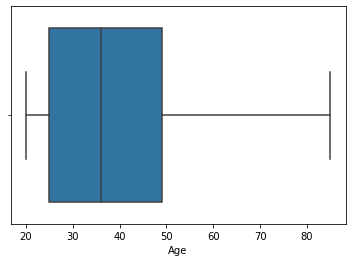

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
df[df['Age']<20]['Response'].value_counts()

Series([], Name: Response, dtype: int64)

In [ ]:
df[df['Age']>=85]['Response'].value_counts()

0    11
Name: Response, dtype: int64

In [ ]:
df['Annual_Premium'].max(),df['Annual_Premium'].min()

(540165.0, 2630.0)

In [ ]:
def outliers(df,features):
  for c in features:
    Q1=np.percentile(df[c],25)
    Q3=np.percentile(df[c],75)
    IQR=Q3-Q1
    outliers=df[(df[c] < (Q1-1.5 * IQR)) | (df[c] > (Q3 + 1.5 * IQR))]
    return outliers.index

In [ ]:
outliers(df,['Annual_Premium'])


Int64Index([    25,     37,     67,    139,    149,    167,    176,    216,
               310,    315,
            ...
            380655, 380733, 380761, 380815, 380860, 380959, 380998, 381035,
            381047, 381079],
           dtype='int64', length=10320)

In [ ]:
df.drop(labels=outliers(df,['Annual_Premium','Vintage']),inplace=True)

In [ ]:
df.corr()[['Response']]

,Response
Age,0.110938
Driving_License,0.009630
Region_Code,0.009474
Previously_Insured,-0.340913
Annual_Premium,0.018566
Policy_Sales_Channel,-0.136805
Vintage,-0.001631
Response,1.000000


In [ ]:
df_test=pd.read_csv('/content/drive/My Drive/TensorFlow/Vehicle_insurance/test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
df_test.shape

(127037, 11)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


# **Visualizing  data**

- ### ***Univariate Analysis***

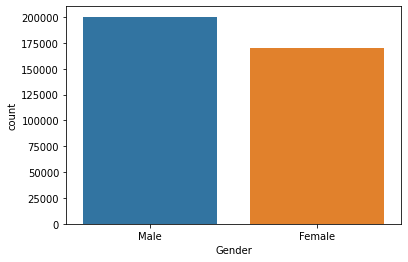

In [ ]:
sns.countplot(df['Gender']);

### *Bivariate Analysis*

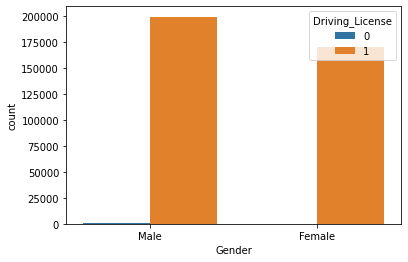

In [ ]:
sns.countplot(df['Gender'],hue=df['Driving_License']);

- Most of the customers had already DL.

### ***Multi Variate Analysis***

<Figure size 720x720 with 0 Axes>

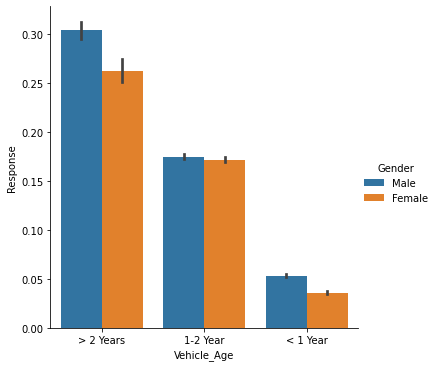

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(x="Vehicle_Age", y="Response", hue="Gender", kind="bar", data=df);

- People whose vehicle age is < 2 years tends to buy insurance compared to others.

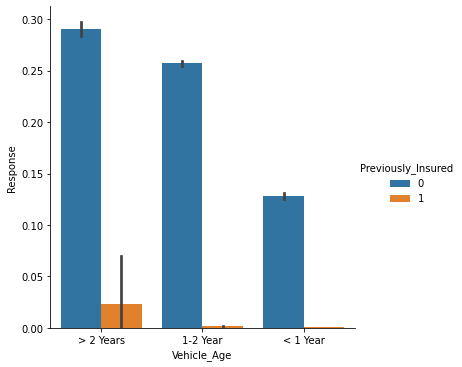

In [ ]:
sns.catplot(x="Vehicle_Age", y="Response", hue="Previously_Insured", kind="bar", data=df);

- Previously_Insured
- 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

- Most of the people who have insured doesnt  want to insure it again.

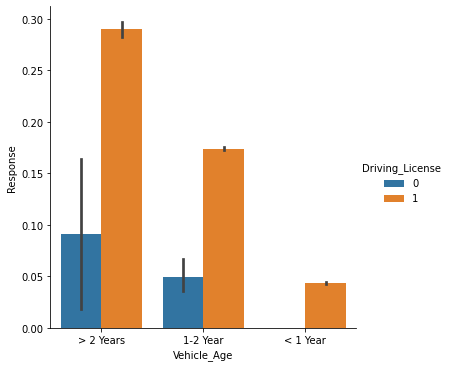

In [ ]:
sns.catplot(x="Vehicle_Age", y="Response", hue="Driving_License", kind="bar", data=df);

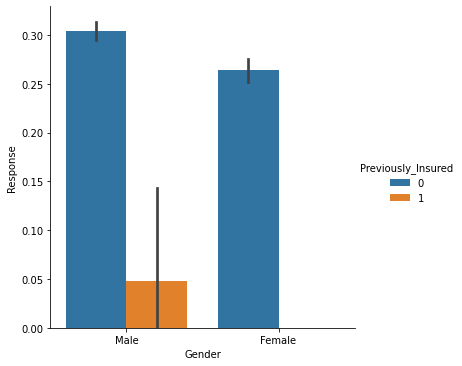

In [ ]:
sns.catplot(x="Gender", y="Response", hue="Previously_Insured", kind="bar", data=df.query("Vehicle_Age == '> 2 Years'"))

- Vehicle_age > 2 years.
- previous insurance was very less which is vehicle age > 2 years.

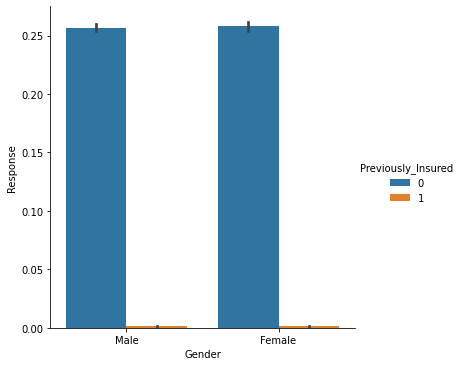

In [ ]:
sns.catplot(x="Gender", y="Response", hue="Previously_Insured", kind="bar", data=df.query("Vehicle_Age == '1-2 Year'"))

- Vehicle_Age  is between 1-2 years.
- insurance was very less.

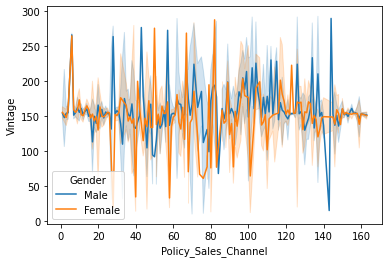

In [ ]:
sns.lineplot(df['Policy_Sales_Channel'],df['Vintage'],hue=df['Gender'])

- Policy_Sales_Channel Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage - Number of Days, Customer has been associated with the company

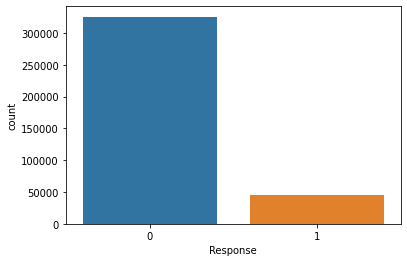

In [ ]:
sns.countplot(df['Response']);

- it is imbalaced Dataset.

In [ ]:
#Train data
df['Gender']=df['Gender'].replace(['Male','Female'],[1,0])
df['Vehicle_Age']=df['Vehicle_Age'].replace(['< 1 Year','1-2 Year','> 2 Years'],[1,2,3])
df['Vehicle_Damage']=df['Vehicle_Damage'].replace(['Yes','No'],[1,0])

#Test data
df_test['Gender']=df_test['Gender'].replace(['Male','Female'],[1,0])
df_test['Vehicle_Age']=df_test['Vehicle_Age'].replace(['< 1 Year','1-2 Year','> 2 Years'],[1,2,3])
df_test['Vehicle_Damage']=df_test['Vehicle_Damage'].replace(['Yes','No'],[1,0])

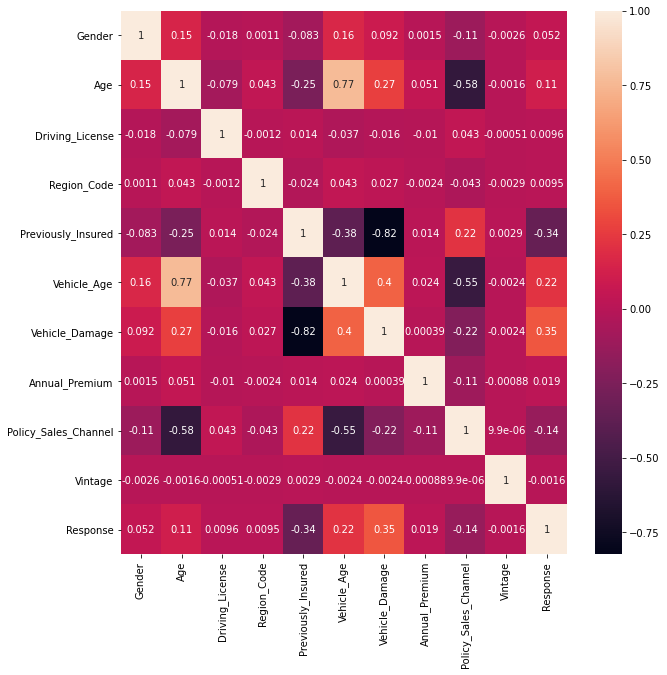

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

In [ ]:
X=df.drop(['Response'],axis=1)
y=df.Response.values

In [ ]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [ ]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [ ]:
X_res,y_res=sm.fit_sample(X,y)

In [ ]:
X_res

array([[1.00000000e+00, 4.40000000e+01, 1.00000000e+00, ...,
        4.04540000e+04, 2.60000000e+01, 2.17000000e+02],
       [1.00000000e+00, 7.60000000e+01, 1.00000000e+00, ...,
        3.35360000e+04, 2.60000000e+01, 1.83000000e+02],
       [1.00000000e+00, 4.70000000e+01, 1.00000000e+00, ...,
        3.82940000e+04, 2.60000000e+01, 2.70000000e+01],
       ...,
       [2.67276881e-01, 4.49308925e+01, 1.00000000e+00, ...,
        2.79363272e+04, 2.60000000e+01, 1.30465446e+02],
       [8.92710858e-01, 5.66781326e+01, 1.00000000e+00, ...,
        3.71527125e+04, 2.60000000e+01, 7.66822286e+01],
       [2.38323507e-01, 3.19532940e+01, 1.00000000e+00, ...,
        2.56808503e+04, 1.52000000e+02, 2.09580877e+01]])

In [ ]:
X_res.shape,y_res.shape

((651268, 10), (651268,))

In [ ]:
from collections import Counter
print("Orginal Dataset Shape {}".format(Counter(y)))
print("Applying Smote dataset shape {}".format(Counter(y_res)))

Orginal Dataset Shape Counter({0: 325634, 1: 45155})
Applying Smote dataset shape Counter({1: 325634, 0: 325634})


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import  XGBClassifier
xg=XGBClassifier()

##### Stratified KFold

In [ ]:
# stratified k-fold cross validation evaluation of xgboost mode
from sklearn.model_selection import  StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
# kfold=StratifiedKFold(n_splits=20,random_state=7)

# acc_stratified=[]
# for train_index,test_index in kfold.split(X_res,y_res):
#   x_train_fold,x_test_fold=X_res[train_index],X_res[test_index]
#   y_train,y_test=y_res[train_index],y_res[test_index]
#   xg.fit(x_train_fold,y_train)
#   acc_stratified.append(xg.score(x_test_fold,y_test))

# print('List of possible accuracy:',acc_stratified)
# print('Max accuracy',max(acc_stratified))

In [ ]:
model=XGBClassifier()
cv=StratifiedKFold(n_splits=20,random_state=5)
results=cross_val_score(model,X_res,y_res,scoring='accuracy',cv=cv)
print(results.mean())

0.8617363291178105


In [ ]:
print(results.mean())

0.8617363291178105


- CV Score gives us the estimation about the accuracy but doesn't improve it.

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=23,stratify=y_res,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455887, 10)
(195381, 10)
(455887,)
(195381,)


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve

In [ ]:
#Fitting the model on the data
xg.fit(X_train,y_train)
print("Accuarcy on testing",accuracy_score(y_test,xg.predict(X_test)))

Accuarcy on testing 0.8650943541081272


### Metrics for imbalanced dataset.

In [ ]:
precision_score(y_test,xg.predict(X_test))

0.8257422848949247

In [ ]:
recall_score(y_test,xg.predict(X_test))

0.9254997901546713

In [ ]:
f1_score(y_test,xg.predict(X_test))

0.8727797513321491

In [ ]:
xg_probs=xg.predict_proba(X_test)[:,1]
xg_probs

array([0.68266886, 0.18880257, 0.8998241 , ..., 0.6606031 , 0.91626185,
       0.9945193 ], dtype=float32)

In [ ]:
xg_auc=roc_auc_score(y_test,xg_probs)
print("xg_area",xg_auc)

xg_area 0.9583703763506699


In [ ]:
fpr,tpr,th=roc_curve(y_test,xg_probs)

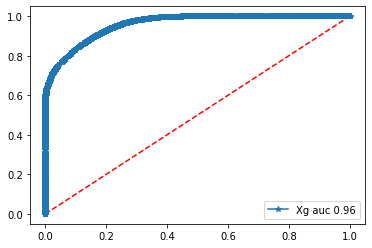

In [ ]:
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.plot(fpr,tpr,marker='*',label='Xg auc {}'.format(xg_auc.round(2)))
plt.legend()

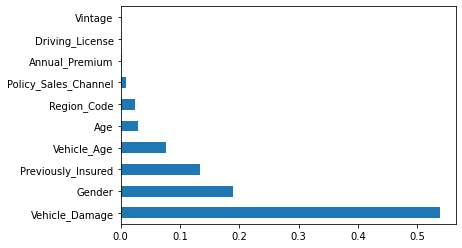

In [ ]:
feat_importances = pd.Series(xg.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
#feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

## Hyperparameter Tuning

In [ ]:
parameters={"learning_rate"    : [0.10, 0.15, 0.2] ,
 "max_depth"        : [6,8,10],
 "min_child_weight" : [ 1, 3],
 "gamma"            : [ 0.1, 0.3],
 "colsample_bytree" : [ 0.3,0.5] }


In [ ]:
rd_obj=RandomizedSearchCV(xg,parameters,scoring='accuracy',cv=20)

In [ ]:
rd_obj

RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...s_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depre

In [ ]:
start=time.time()
rd_obj.fit(X_train,y_train)
end=time.time()
print("Total time taken is {}".format(end-start))

Total time taken is 7589.5427803993225


In [ ]:
rd_obj.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.3,
 'learning_rate': 0.2,
 'max_depth': 10,
 'min_child_weight': 1}

In [ ]:
best_split=rd_obj.best_estimator_
best_split

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model_xg=best_split.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
print("CV Score ", cross_val_score(model_xg,X_train,y_train,cv=20,scoring='accuracy').mean())

CV Score  0.9262799686013506


In [ ]:
accuracy_score(y_test,model_xg.predict(X_test))

0.9246651414415936

- After Performing HyperParameter Tuning accuracy was increased from 0.86 to 0.92

## Metrics after Performing Hyper Parameter Tuning

In [ ]:
precision_score(y_test,model_xg.predict(X_test))

0.9743751000525991

In [ ]:
recall_score(y_test,model_xg.predict(X_test))

0.8722707311830158

In [ ]:
f1_score(y_test,model_xg.predict(X_test))

0.9205001485322315